# PageRank in citation networks

In [46]:
import networkx as nx
import pandas as pd
import random as rn
import numpy as np
from pylab import *
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Computer Modern'],'size': 18})
rc('text', usetex=True)

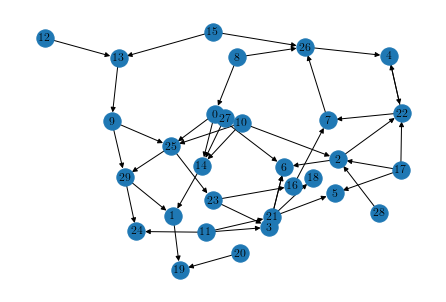

In [43]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True)

In [42]:
rank = nx.pagerank(g)
df_rank = pd.DataFrame.from_dict(rank, orient='index', columns={'Rank'})
df_rank.sort_values(by='Rank', ascending=False)

,Rank
4,0.151941
22,0.150574
26,0.092544
7,0.088690
19,0.053759
6,0.043572
1,0.043056
29,0.032410
25,0.027217
9,0.027215


The rules of the random surfer simulation are as follows:
- Start the surfer on a random node in the network.
- Repeat N times:
    - With probability α, move the surfer to a random neighbor of the current node. If the current node has no neighbors, move the surfer to a random node in the network.
    - With probability (1 –  α) , move the surfer to a random node in the network.

To calculate the approximate PageRank of each node, keep track of how many times the surfer visited each node and divide by the total number of visits so that the sum of all PageRank scores is 1.
In the NetworkX library, the default value for α is 0.85.
Draw a plot of the average absolute difference between your PageRank values from the simulation and the output from the networkx.pagerank() function as a function of N, the number of steps taken by the random surfer.

In [70]:
def Random_walk(graph, N):
    visits = [0]*len(graph)
    current_node = rn.choice(range(len(graph)))
    
    for i in range(N):
        visits[current_node] += 1/N
        neighbors = [_ for _ in graph.successors(current_node)]
        
        if rn.random() < .85 and len(neighbors) != 0:
            current_node = rn.choice(neighbors)
        else: current_node = rn.choice(range(len(graph)))
            
    return visits
ranking = Random_walk(g, 10**4)

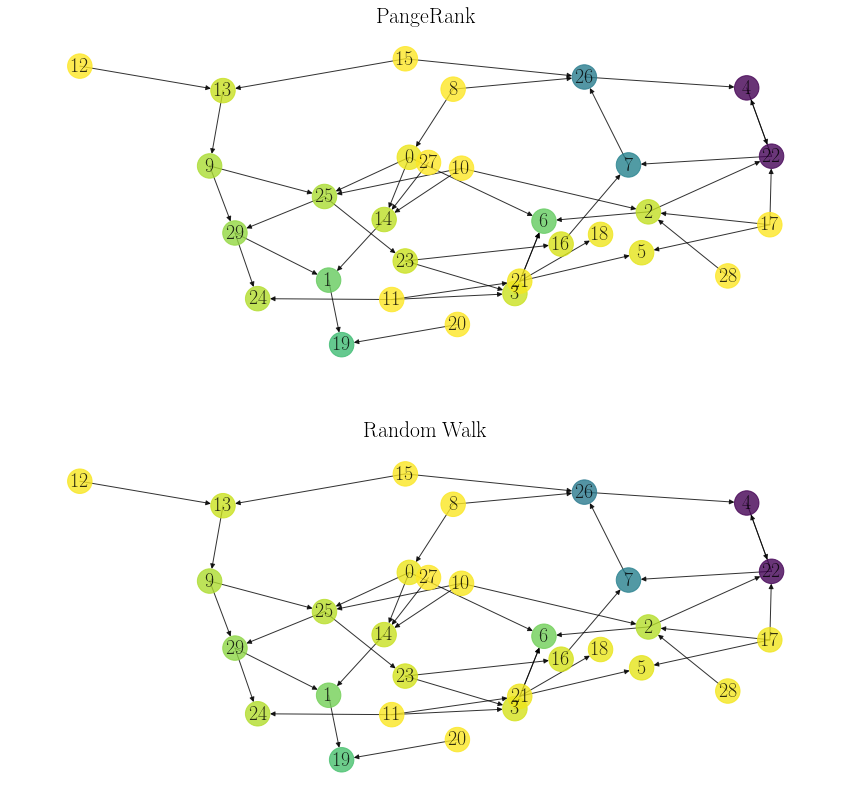

In [71]:
plt.figure(figsize=(15,14))
plt.subplot(2, 1, 1)
plt.title('PangeRank')
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=-np.array(df_rank['Rank']), 
        alpha=.8, with_labels=True, node_size=600, font_size=20)

plt.subplot(2, 1, 2)
plt.title('Random Walk')
nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=-np.array(ranking), 
        alpha=.8, with_labels=True, node_size=600, font_size=20)
plt.show()

In [ ]:
error, steps = [], list(range(100, 10**5, 100))

for N in steps:
    ranking = Random_walk(g, N)  
    error.append(sum(abs(np.array(ranking) - np.array(df_rank['Rank']))))

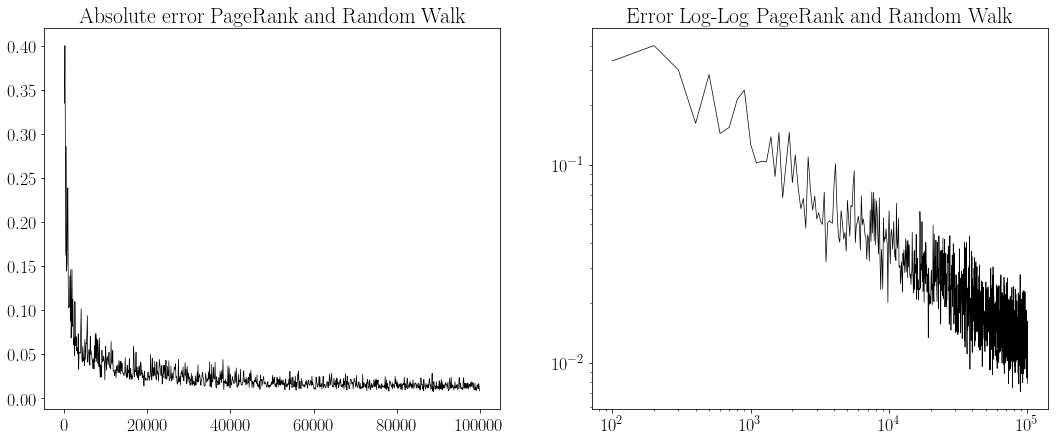

In [109]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plt.title('Absolute error PageRank and Random Walk')
plt.plot(steps, error, linewidth=.7, color='black')

plt.subplot(1, 2, 2)
plt.title('Error Log-Log PageRank and Random Walk')
plt.loglog(steps, error, linewidth=.7, color='black')
plt.show()